In [5]:
import matplotlib.pyplot as plt
import numpy as np

This will be a simple investigation of the logistic map, with a goal of calculating Feigenbaum's constant. This all follows from Froyland's $\textit{Introduction to Chaos and Coherence}$. We begin by defining a simple implementation of the logstic map.

In [6]:
# We require x and q in [0, 1]
def f(x, q):
    return np.multiply(4, np.multiply(q, np.multiply(x, (1 - x))))
#     return 4 * q * x * (1 - x)

We check the convergence properties of the map for small values of the function parameter, $q$. We pick some parameter values at random which are smaller than a half and pick a random $x$ value from the unit interval to see how they converge. We pick four such values for $q$ and then iterate a few hundred times on the map by the rule $x_{n+1} = f(x_n, q)$. 

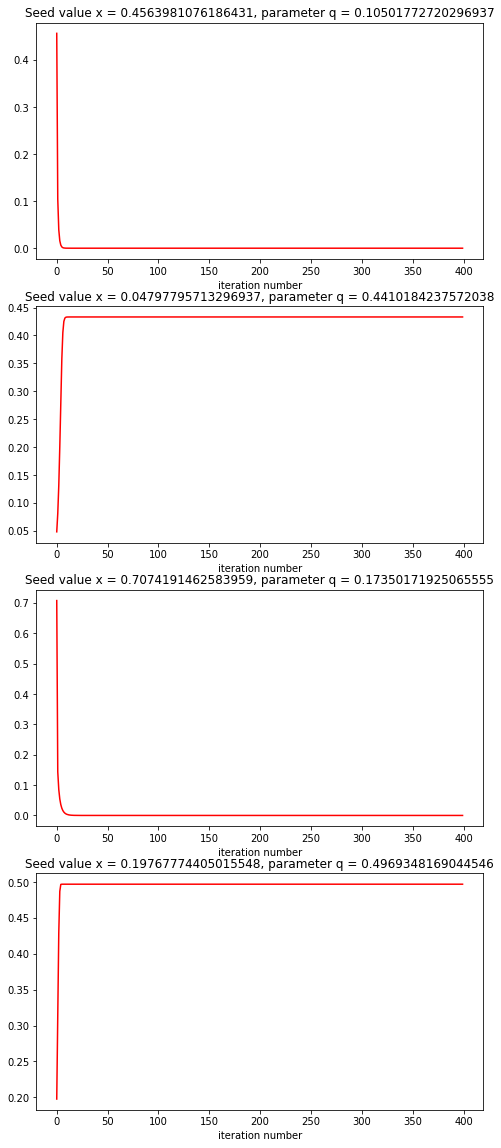

In [15]:
fig, a = plt.subplots(4, 1, figsize=(8, 20))
# x = np.array([[],[],[],[]])
# print(x[0])
# q = [0, 0, 0, 0]
for i in range(4):
    r = np.random.random()
    y = np.array([r])
#     print(y, r)
    p = np.multiply(np.random.random(), 0.5)
#     q[i] = p
    for n in range(399):
        y = np.append(y, f(y[n], p))
    a[i].plot(range(400), y, 'r')
    a[i].set_title('Seed value x = {}, parameter q = {}'.format(y[0], p))
    a[i].set_xlabel('iteration number')
#     x[i] = y
plt.show()

Convergence is very rapid. We may then check what happens for values of $q$ between a half and three quarters.

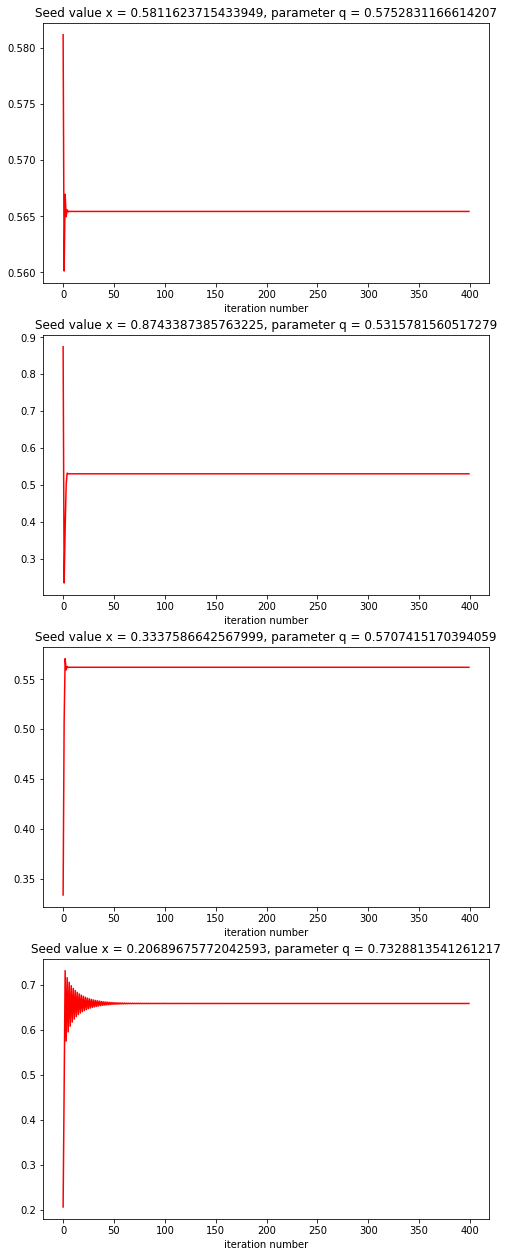

In [4]:
fig, a = plt.subplots(4, 1, figsize=(8, 22))
# x = np.array([[],[],[],[]])
# print(x[0])
# q = [0, 0, 0, 0]
for i in range(4):
    r = np.random.random()
    y = np.array([r])
#     print(y, r)
    p = np.multiply(np.random.random(), 0.25) + 0.5
#     q[i] = p
    for n in range(399):
        y = np.append(y, f(y[n], p))
    a[i].plot(range(400), y, 'r')
    a[i].set_title('Seed value x = {}, parameter q = {}'.format(y[0], p))
    a[i].set_xlabel('iteration number')
#     x[i] = y
plt.show()

Now we check the interesting regime, from 3 / 4 to 1.

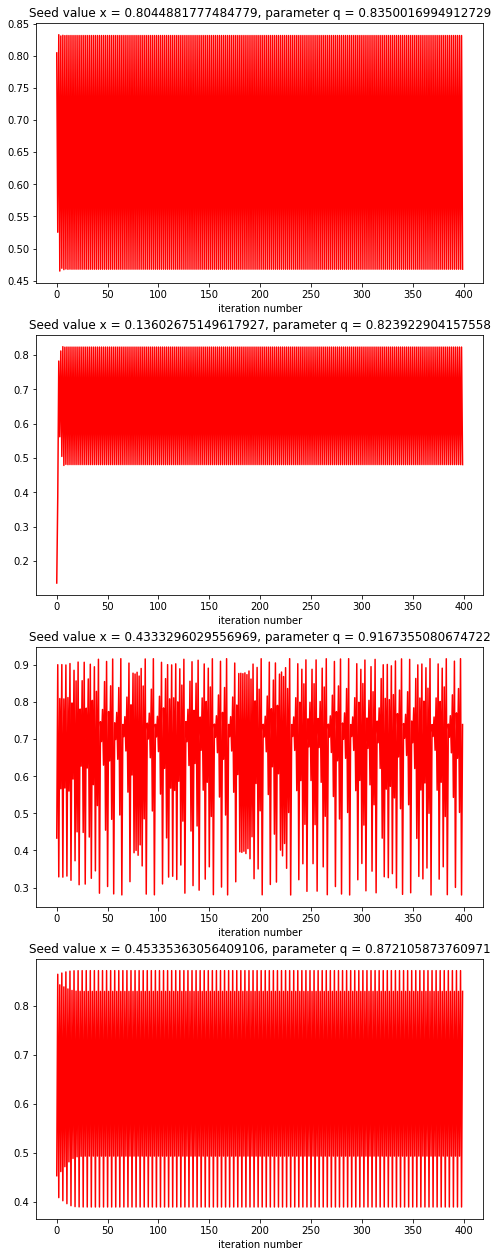

In [16]:
fig, a = plt.subplots(4, 1, figsize=(8, 22))
# x = np.array([[],[],[],[]])
# print(x[0])
# q = [0, 0, 0, 0]
for i in range(4):
    r = np.random.random()
    y = np.array([r])
#     print(y, r)
    p = np.multiply(np.random.random(), 0.25) + .75
#     q[i] = p
    for n in range(399):
        y = np.append(y, f(y[n], p))
    a[i].plot(range(400), y, 'r')
    a[i].set_title('Seed value x = {}, parameter q = {}'.format(y[0], p))
    a[i].set_xlabel('iteration number')
#     x[i] = y
plt.show()

We are about to make some very meaty plots, but first, some analytic work with the function. For smaller values of our function parameter, we see that we always converge to some value. This is a value whereupon the iteration of the logistic map does not move the point, that is, one with $x = 4 q x (1 - x)$. Clearly $x = 0$ is one such point, and another lies at $1 = 4 q (1 - x) \implies 1 - x = 1 / 4q \implies x = 1 - \frac{1}{4q}$. However, only one of these points will attract random seed values. We check the derivative to see how points drift. We can see $f'(x) = 4 q - 8 q x$, so that $f'(0 + \epsilon) = 4q - 8 q \epsilon > 0$, so that points in the unit interval are pushed away from the first constant orbit, and $f'(1 - 1/4q + \epsilon) = 4q - 8q(1 + \epsilon) + 2 = 2 - 4q - \epsilon'$. For small $\epsilon$, this means that values near the second constant orbit are pushed away if $q > 1/2$, attracted if $q < 1/2$.

In [22]:
def logPlot(lo, wid, tics, sub, it=200, a=None):
#     plt.figure(figsize=(20, 15))
    if wid + lo <= 1.0 and lo > 0:
        x = np.array([])
        y = np.array([])
        for i in range(int(tics)):
            r = np.random.random()
            q = lo + (wid / tics) * i
            for n in range(200 + it):
                r = f(r, q)
                if n > 200:
                    x = np.append(x, q)
                    y = np.append(y, r)
        if not sub:
            plt.scatter(x, y, s=1, c='r', marker=".")
            plt.title('Values of map after 200 interations')
            plt.xlabel('Map parameter')
            plt.ylabel('Function value')
#             plt.show()
        else:
            a[0].scatter(x, y, s=1, c='r', marker=".")
            a[0].set_title('Values of map after 200 interations')
            a[0].set_xlabel('Map parameter')
            a[0].set_ylabel('Function value')
#             plt.show()
    else:
        print('Your window lies outside the unit interval.')

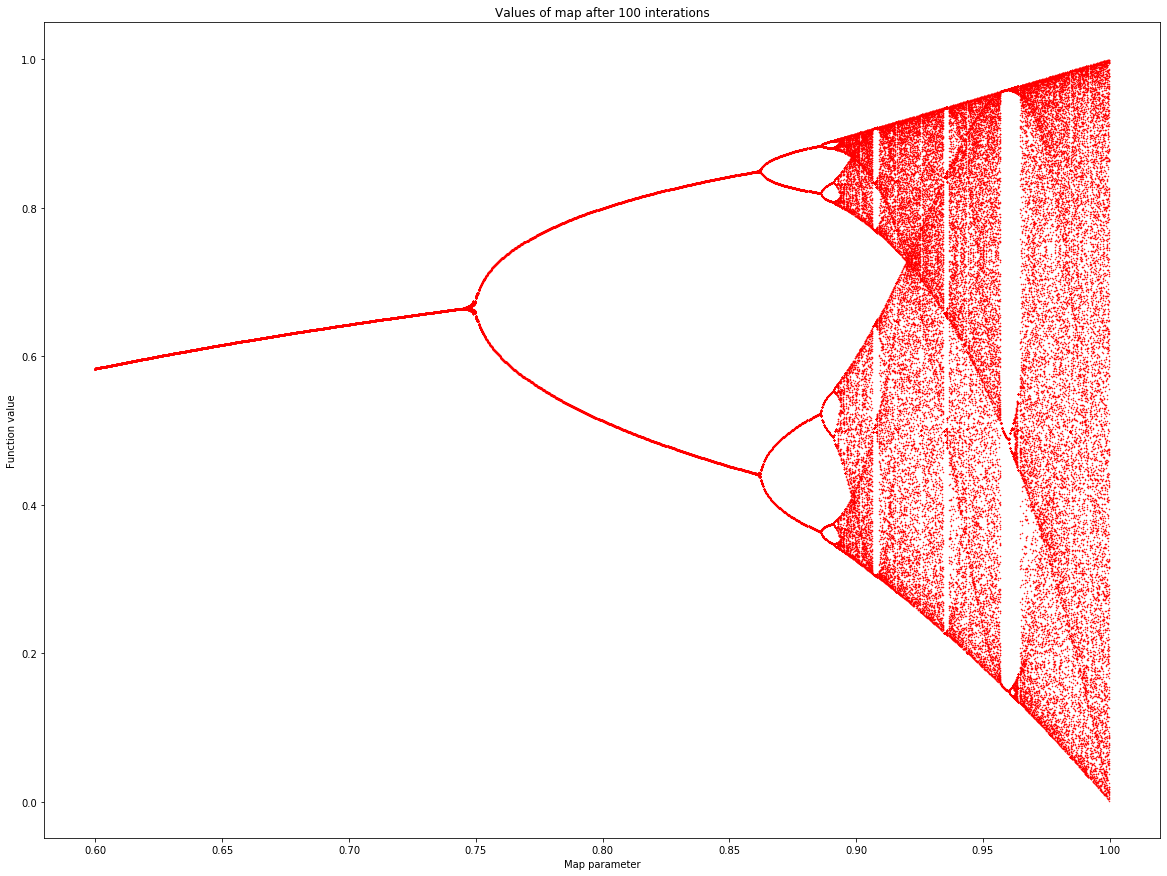

In [38]:
logPlot(0.60, 0.40, 1000.0)

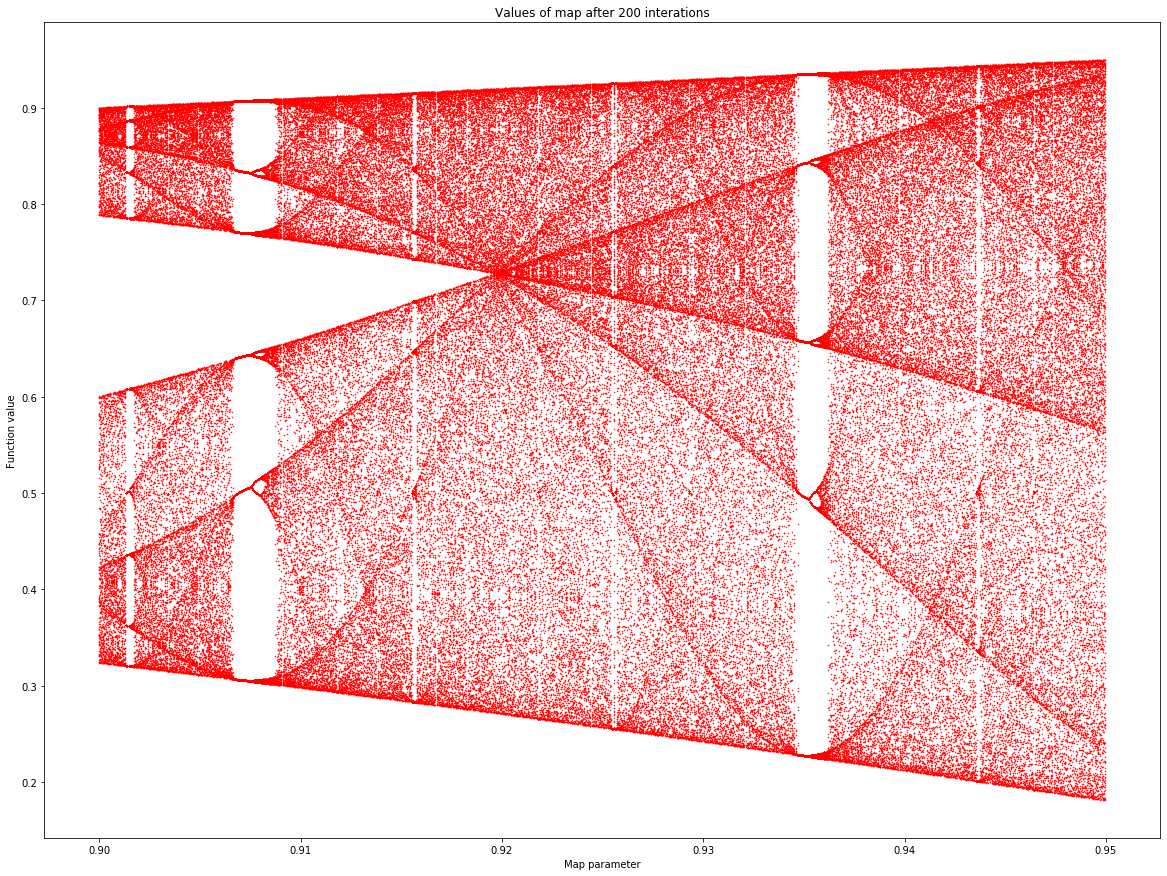

In [40]:
logPlot(0.9, 0.05, 1000.0)

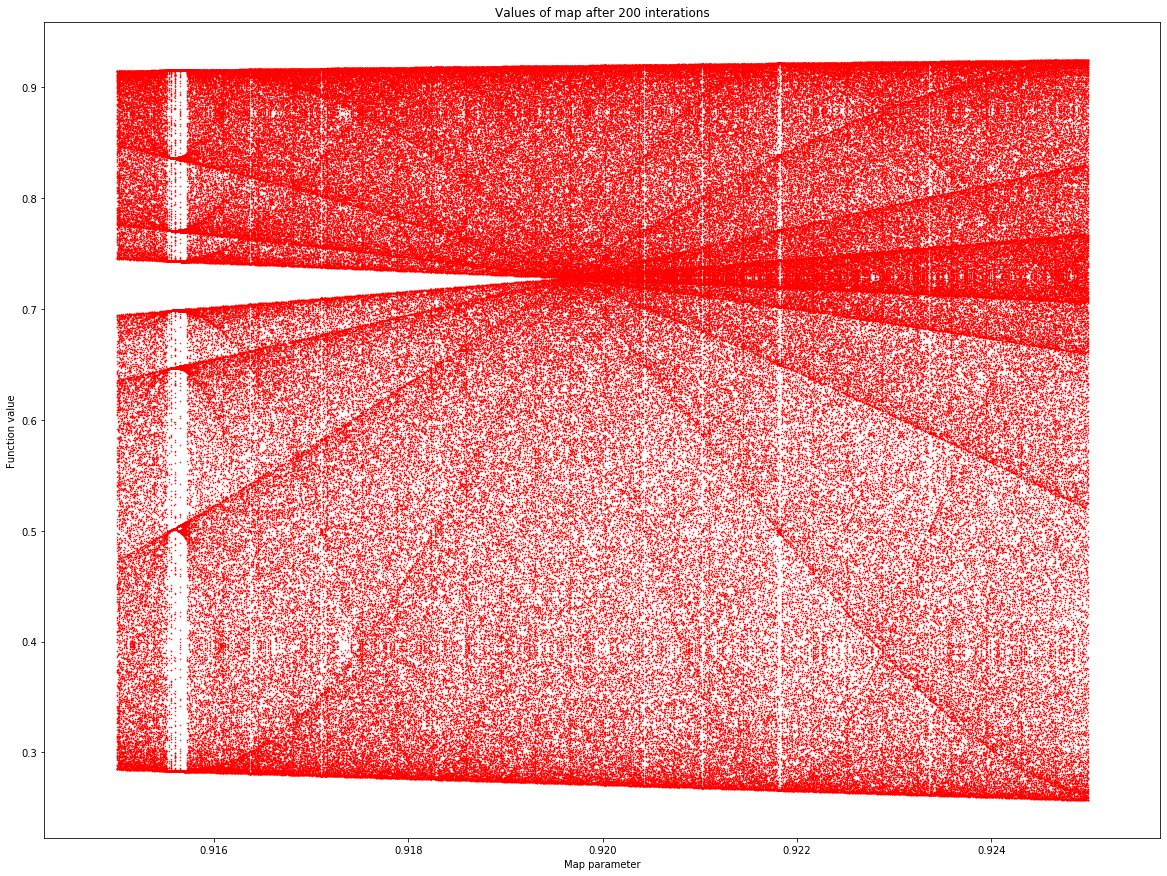

In [43]:
logPlot(0.915, 0.01, 1000.0, 400)

We notice additional structure above. Namely, we can see many curves along which out points seem to congregate. 

In [15]:
def frep(x, q, n):
    if n == 1:
        return f(x, q)
    if n > 1:
        y = frep(x, q, n - 1)
        return f(y, q)
    else:
        print('The final parameter must be an integer.')

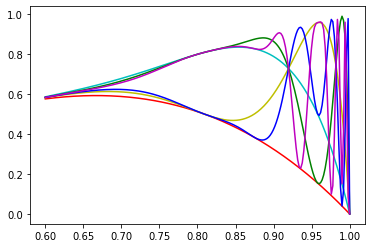

In [16]:
plt.cla()

x = np.linspace(0.6, 1.0, 200)
plt.plot(x, frep(1/2, x, 2), c='r', label='n = 2')
plt.plot(x, frep(1/2, x, 3), c='c', label='n = 3')
plt.plot(x, frep(1/2, x, 4), c='y', label='n = 4')
plt.plot(x, frep(1/2, x, 5), c='g', label='n = 5')
plt.plot(x, frep(1/2, x, 6), c='b', label='n = 6')
plt.plot(x, frep(1/2, x, 7), c='m', label='n = 7')
plt.show()

In [29]:
def logSkel(lo, wid, tics, deg):
    plt.figure(figsize=(20, 15))
    logPlot(lo, wid, tics, False)
    x = np.linspace(lo, lo + wid, tics)
    if deg > 1:
        for i in range(1, deg):
            plt.plot(x, frep(1/2, x, 1 + i), c='b')
# plt.show()

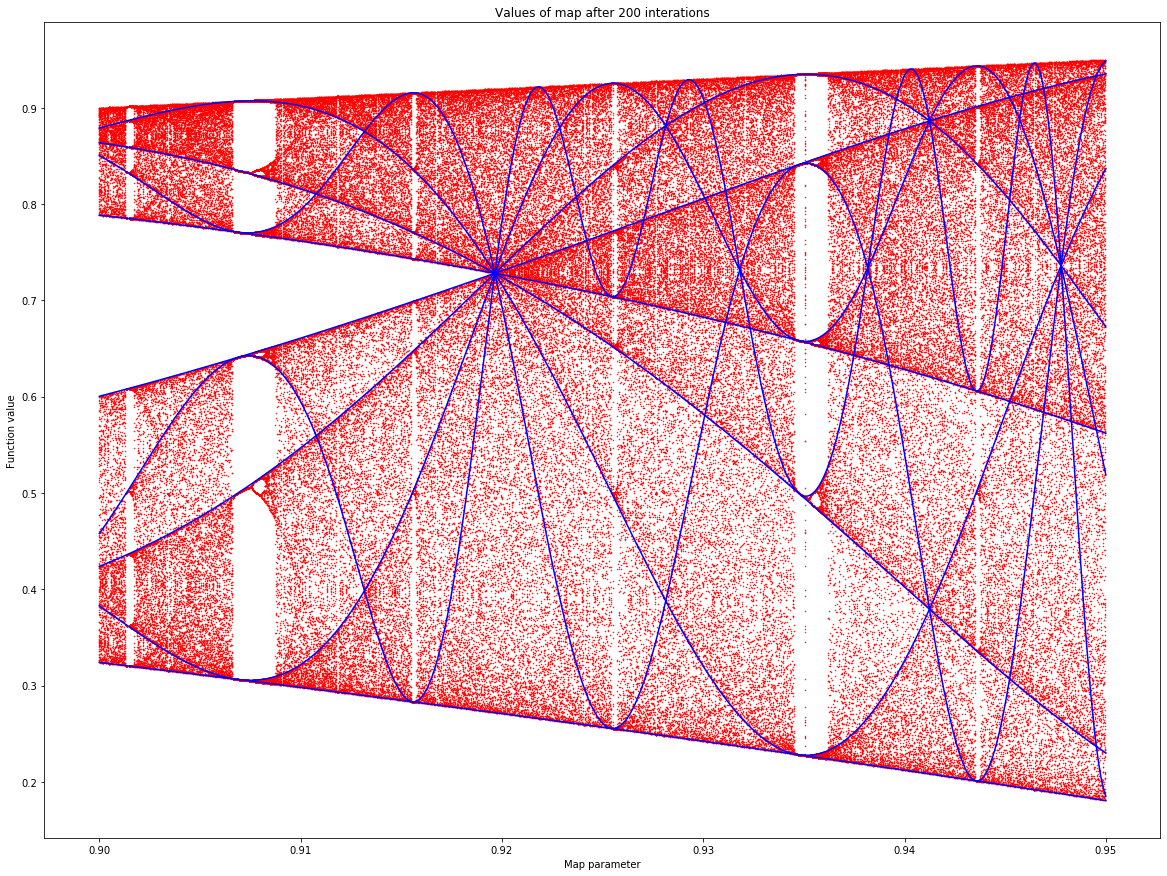

In [30]:
logSkel(0.90, 0.05, 1000.0, 10)

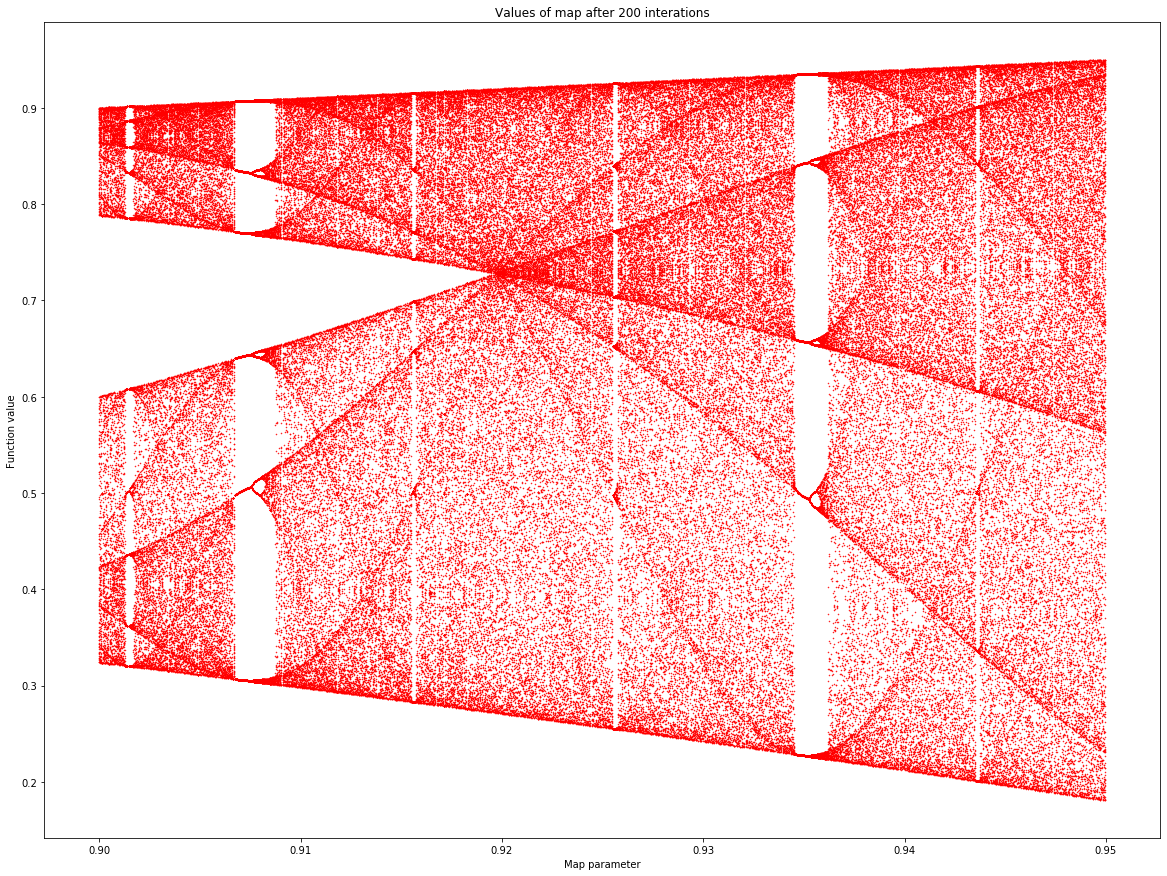

In [31]:
plt.figure(figsize=(20, 15))
logPlot(0.90, 0.05, 1000.0, False)
plt.show()